# Spark Funds
## An Investment Case Study by Aman Srivastava
1. **Business objective:** The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.
2. **Goals of data analysis:** Your goals are divided into three sub-goals:

    - Investment type analysis: Comparing the typical investment amounts in the venture, seed, angel, private equity etc. so that Spark Funds can choose the type that is best suited for their strategy.
    - Country analysis: Identifying the countries which have been the most heavily invested in the past. These will be Spark Funds’ favourites as well.
    - Sector analysis: Understanding the distribution of investments across the eight main sectors. (Note that we are interested in the eight 'main sectors' provided in the mapping file. The two files — companies and rounds2 — have numerous sub-sector names; hence, you will need to map each sub-sector to its main sector.)

### Importing Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Loading the companies and rounds data
companies = pd.read_csv('companies.txt', sep="\t", header = 0, encoding = "ANSI",verbose=True, skipinitialspace=True)
rounds2 = pd.read_csv("rounds2.csv", sep=",", header = 0, encoding = "ANSI",verbose=True, skipinitialspace=True)

Tokenization took: 123.55 ms
Type conversion took: 484.20 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 0.00 ms
Type conversion took: 4.13 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 121.07 ms
Type conversion took: 442.49 ms
Parser memory cleanup took: 0.00 ms


In [11]:
# Printing Head of companies
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [12]:
# Printing head of rounds2
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [13]:
# Changing the column name in companies data frame to match with rounds2 dataframe
companies.rename(columns={'permalink': 'company_permalink'}, inplace=True)
companies.head()

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [14]:
# Converting the company_permalink to lowercase for both the data frames

companies['company_permalink'] = companies['company_permalink'].str.lower()
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

In [15]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [16]:
companies.head()

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


### Finding the unique companies in companies data frame

In [17]:
companies.shape

(66368, 10)

### Finding the unique companies in rounds2 data frame

In [18]:
len(rounds2.company_permalink.unique().tolist())

66368

### Finding if if there  are any companies in the rounds2 file which are not  present in companies

In [19]:
main_list = np.setdiff1d(rounds2.company_permalink.unique().tolist(),companies.company_permalink.unique().tolist())
len(main_list)

0

### Merging both the data frames

In [20]:
master_frame = pd.merge(rounds2, companies, how = 'inner', on = 'company_permalink')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


## Handling missing values

In [21]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
dtypes: float64(1), object(14)
memory usage: 14.0+ MB


In [22]:
# finding the sum of null values column values
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [23]:
# finding values of each category in 'funding_round_type' column
master_frame['funding_round_type'].value_counts()

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

In [24]:
# checking percentage of null values with respect to data frame
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [25]:
# replacing the null values in raised_amount_usd column with the median value

med = master_frame['raised_amount_usd'].median(skipna=True)
master_frame["raised_amount_usd"] = master_frame["raised_amount_usd"].apply(lambda x: med if (np.isnan(x) or x==0) else x)
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,1680511.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [26]:
master_frame['funding_round_type'].value_counts()

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

In [27]:
master_frame['category_list'] = master_frame['category_list'].astype(str)

In [28]:
# replacing the nan with 'Other' in category_list column

master_frame['category_list'] = master_frame.apply(lambda x: x['category_list'].replace('nan','Other'), axis=1)
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd              0
name                           1
homepage_url                6134
category_list                  0
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [29]:
# finding mean of each funding_round_type

pd.set_option('float_format', '{:f}'.format)
master_frame.groupby('funding_round_type', as_index=False)['raised_amount_usd'].mean()

,funding_round_type,raised_amount_usd
0,angel,1113406.881851
1,convertible_note,1521875.017061
2,debt_financing,16575269.472806
3,equity_crowdfunding,1343790.599939
4,grant,4211592.728636
5,non_equity_assistance,1221778.293194
6,post_ipo_debt,168704571.822368
7,post_ipo_equity,80920707.305643
8,private_equity,62370667.823632
9,product_crowdfunding,1398104.636585


In [30]:
# finding top9 countries with funding_round_type = venture

venture_country = master_frame[(master_frame['funding_round_type'] == 'venture')].groupby(['country_code'])["raised_amount_usd"].sum().sort_values(ascending=False).reset_index()
venture_country = venture_country.head(9)
venture_country

,country_code,raised_amount_usd
0,USA,426297034079.000000
1,CHN,40714326026.000000
2,GBR,20664074655.000000
3,IND,14675865077.000000
4,CAN,9734578307.000000
5,FRA,7373811480.000000
6,ISR,7099092833.000000
7,DEU,6733477352.000000
8,JPN,3437619095.000000


In [31]:
# Creating top9 framework with funding_round_type = venture and country_code in the list shown above

top9 = master_frame[(master_frame['funding_round_type'] == 'venture') & (master_frame.country_code.isin(venture_country.country_code.tolist()))]
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000000,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,1680511.000000,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.000000,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,1680511.000000,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.000000,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997


In [32]:
# Finding the main category

top9['category_list'] = top9['category_list'].str.split('|').str.get(0)
top9.head()

C:\Users\amansrivasta\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000000,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,1680511.000000,:Qounter,http://www.qounter.com,Application Platforms,operating,USA,DE,DE - Other,Delaware City,04-09-2014
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.000000,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,1680511.000000,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.000000,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997


In [33]:
top9['category_list'] = top9['category_list'].str.lower()
top9.head()

C:\Users\amansrivasta\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000000,#fame,http://livfame.com,media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,1680511.000000,:Qounter,http://www.qounter.com,application platforms,operating,USA,DE,DE - Other,Delaware City,04-09-2014
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.000000,0-6.com,http://www.0-6.com,curated web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,1680511.000000,004 Technologies,http://004gmbh.de/en/004-interact,software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.000000,Ondine Biomedical Inc.,http://ondinebio.com,biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997


## Importing mapping data frame

In [34]:
mapping=pd.read_csv('mapping.csv', skipinitialspace=True)
mapping['category_list'] = mapping['category_list'].str.lower()
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3d,0,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,0,1,0,0,0
4,accounting,0,0,0,0,0,0,0,0,1


In [35]:
# removing the row with Nan in category_list

mapping.dropna(subset=['category_list'], how='all', inplace = True)
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3d,0,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,0,1,0,0,0
4,accounting,0,0,0,0,0,0,0,0,1
5,active lifestyle,0,0,0,0,1,0,0,0,0


In [36]:
# removing category_list

primary_categories = list(mapping.columns.values)[1:]
print(primary_categories)

['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising']


### Merging data sets

In [37]:
mf_sector_mapped= top9.merge(mapping,on='category_list')
mf_sector_mapped.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,...,founded_at,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000000,#fame,http://livfame.com,media,operating,...,NaN,0,0,0,1,0,0,0,0,0
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.000000,90min,http://www.90min.com,media,operating,...,01-01-2011,0,0,0,1,0,0,0,0,0
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.000000,90min,http://www.90min.com,media,operating,...,01-01-2011,0,0,0,1,0,0,0,0,0
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.000000,90min,http://www.90min.com,media,operating,...,01-01-2011,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.000000,All Def Digital,http://alldefdigital.com,media,operating,...,NaN,0,0,0,1,0,0,0,0,0


In [38]:
new = mf_sector_mapped.head(5)
new['company_permalink'] = new['company_permalink'].astype('str')

C:\Users\amansrivasta\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
# loop for mapping each main category with primary category

for index, row in mf_sector_mapped.iterrows():
    for column in primary_categories:
        if (row[column] == 1):
            mf_sector_mapped.at[index,"primary_cat"] = column
            break

In [40]:
# mapping main category 'Other' with primary category 'Others'
for index, row in mf_sector_mapped.iterrows():
       if(row['category_list'].lower() == 'Other'):
            mf_sector_mapped['primary_cat'] = 'Others'

In [41]:
mf_sector_mapped.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,...,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",primary_cat
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000000,#fame,http://livfame.com,media,operating,...,0,0,0,1,0,0,0,0,0,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.000000,90min,http://www.90min.com,media,operating,...,0,0,0,1,0,0,0,0,0,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.000000,90min,http://www.90min.com,media,operating,...,0,0,0,1,0,0,0,0,0,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.000000,90min,http://www.90min.com,media,operating,...,0,0,0,1,0,0,0,0,0,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.000000,All Def Digital,http://alldefdigital.com,media,operating,...,0,0,0,1,0,0,0,0,0,Entertainment


In [42]:
# creating D1 data frame for USA

D1 = mf_sector_mapped[(mf_sector_mapped['country_code'] == 'USA') & (mf_sector_mapped['raised_amount_usd'] >= 5000000) & (mf_sector_mapped['raised_amount_usd'] <= 15000000) ]
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,...,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",primary_cat
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.000000,All Def Digital,http://alldefdigital.com,media,operating,...,0,0,0,1,0,0,0,0,0,Entertainment
14,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.000000,ChefsFeed,http://www.chefsfeed.com,media,operating,...,0,0,0,1,0,0,0,0,0,Entertainment
21,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.000000,The Huffington Post,http://www.huffingtonpost.com,media,acquired,...,0,0,0,1,0,0,0,0,0,Entertainment
22,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.000000,The Huffington Post,http://www.huffingtonpost.com,media,acquired,...,0,0,0,1,0,0,0,0,0,Entertainment
28,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.000000,MatchMine,http://matchmine.com,media,closed,...,0,0,0,1,0,0,0,0,0,Entertainment


In [43]:
# creating D2 data frame for GBR

D2 = mf_sector_mapped[(mf_sector_mapped['country_code'] == 'GBR') & (mf_sector_mapped['raised_amount_usd'] >= 5000000) & (mf_sector_mapped['raised_amount_usd'] <= 15000000) ]
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,...,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",primary_cat
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.000000,90min,http://www.90min.com,media,operating,...,0,0,0,1,0,0,0,0,0,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.000000,90min,http://www.90min.com,media,operating,...,0,0,0,1,0,0,0,0,0,Entertainment
72,/organization/common-interest-communities,/funding-round/8195587cbd5e51af7514ee92ef4ba6ba,venture,NaN,09-07-2014,10000000.000000,Common Interest Communities,http://commoninterestcommunities.com/,application platforms,operating,...,0,0,0,0,0,0,1,0,0,"News, Search and Messaging"
82,/organization/geospock-ltd-,/funding-round/cf3fe3b7c86186b9f478d0ea37613f7a,venture,NaN,01-10-2014,5460000.000000,GeoSpock Ltd.,http://www.geospock.com,application platforms,operating,...,0,0,0,0,0,0,1,0,0,"News, Search and Messaging"
83,/organization/geospock-ltd-,/funding-round/e5e4ef4ebae63fc36ef0cd57dd20ff1c,venture,A,05-10-2015,5400000.000000,GeoSpock Ltd.,http://www.geospock.com,application platforms,operating,...,0,0,0,0,0,0,1,0,0,"News, Search and Messaging"


In [44]:
# creating D3 data frame for IND

D3 = mf_sector_mapped[(mf_sector_mapped['country_code'] == 'IND') & (mf_sector_mapped['raised_amount_usd'] >= 5000000) & (mf_sector_mapped['raised_amount_usd'] <= 15000000)]
D3.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,...,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",primary_cat
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000000,#fame,http://livfame.com,media,operating,...,0,0,0,1,0,0,0,0,0,Entertainment
215,/organization/babajob,/funding-round/b72eaac5ea12ac0f50573ac3d6d46b8d,venture,B,28-04-2015,10000000.000000,Babajob,http://www.babajob.com,curated web,operating,...,0,0,0,0,0,0,1,0,0,"News, Search and Messaging"
238,/organization/bharat-matrimony,/funding-round/e37673bc7b0f1dfd3782f8f7abdb9ec8,venture,B,05-02-2008,11750000.000000,Bharat Matrimony,http://www.bharatmatrimony.com,curated web,operating,...,0,0,0,0,0,0,1,0,0,"News, Search and Messaging"
267,/organization/bluestone-com,/funding-round/452a7fc1f34df2d3dcda4e28234bc671,venture,A,24-01-2012,5000000.000000,Bluestone.com,http://bluestone.com,curated web,operating,...,0,0,0,0,0,0,1,0,0,"News, Search and Messaging"
269,/organization/bluestone-com,/funding-round/f5b252d6442ce231bb01586ca1821f63,venture,B,18-03-2014,10000000.000000,Bluestone.com,http://bluestone.com,curated web,operating,...,0,0,0,0,0,0,1,0,0,"News, Search and Messaging"


In [45]:
# Finding sum of investment for each category

D1_investment = D1.groupby(['primary_cat'])["raised_amount_usd"].sum().sort_values(ascending=False).reset_index()
D1_investment.loc['total'] = D1_investment.sum()
D1_investment

,primary_cat,raised_amount_usd
0,Others,26089280296.000000
1,Cleantech / Semiconductors,21181003033.000000
2,"Social, Finance, Analytics, Advertising",16680695048.000000
3,"News, Search and Messaging",13796816094.000000
4,Health,8200859357.000000
5,Manufacturing,7258553378.000000
6,Entertainment,5000212982.000000
7,Automotive & Sports,1454104361.000000
total,"OthersCleantech / SemiconductorsSocial, Financ...",99661524549.000000


In [46]:
# Finding count of investments in each category

D1_count = D1.groupby(['primary_cat'])["raised_amount_usd"].count().sort_values(ascending=False).reset_index()
D1_count = D1_count.rename(columns={'raised_amount_usd': 'investment_count'})
D1_count.loc['total'] = D1_count.sum()
D1_count

,primary_cat,investment_count
0,Others,2923
1,Cleantech / Semiconductors,2297
2,"Social, Finance, Analytics, Advertising",1912
3,"News, Search and Messaging",1563
4,Health,908
5,Manufacturing,799
6,Entertainment,580
7,Automotive & Sports,167
total,"OthersCleantech / SemiconductorsSocial, Financ...",11149


In [47]:
# Finding sum of investment for each category

D2_investment = D2.groupby(['primary_cat'])["raised_amount_usd"].sum().sort_values(ascending=False)
D2_investment.loc['total'] = D2_investment.sum()
D2_investment

primary_cat
Others                                    1249124289.000000
Cleantech / Semiconductors                1136905008.000000
Social, Finance, Analytics, Advertising    821888357.000000
News, Search and Messaging                 615746235.000000
Entertainment                              461511059.000000
Manufacturing                              361940335.000000
Health                                     214537510.000000
Automotive & Sports                        167051565.000000
total                                     5028704358.000000
Name: raised_amount_usd, dtype: float64

In [48]:
# Finding count of investments in each category

D2_count = D2.groupby(['primary_cat'])["raised_amount_usd"].count().sort_values(ascending=False).reset_index()
D2_count = D2_count.rename(columns={'raised_amount_usd': 'investment_count'})
D2_count.loc['total'] = D2_count.sum()
D2_count

,primary_cat,investment_count
0,Others,143
1,Cleantech / Semiconductors,127
2,"Social, Finance, Analytics, Advertising",98
3,"News, Search and Messaging",73
4,Entertainment,54
5,Manufacturing,42
6,Health,24
7,Automotive & Sports,16
total,"OthersCleantech / SemiconductorsSocial, Financ...",577


In [49]:
# Finding sum of investment for each category

D3_investment = D3.groupby(['primary_cat'])["raised_amount_usd"].sum().sort_values(ascending=False)
D3_investment.loc['total'] = D3_investment.sum()
D3_investment

primary_cat
Others                                    1007409507.000000
News, Search and Messaging                 433834545.000000
Social, Finance, Analytics, Advertising    290543500.000000
Entertainment                              280830000.000000
Manufacturing                              200900000.000000
Health                                     167740000.000000
Cleantech / Semiconductors                 165380000.000000
Automotive & Sports                        136900000.000000
total                                     2683537552.000000
Name: raised_amount_usd, dtype: float64

In [50]:
# Finding count of investments in each category

D3_count = D3.groupby(['primary_cat'])["raised_amount_usd"].count().sort_values(ascending=False).reset_index()
D3_count = D3_count.rename(columns={'raised_amount_usd': 'investment_count'})
D3_count.loc['total'] = D3_count.sum()
D3_count

,primary_cat,investment_count
0,Others,109
1,"News, Search and Messaging",52
2,Entertainment,33
3,"Social, Finance, Analytics, Advertising",32
4,Manufacturing,21
5,Cleantech / Semiconductors,20
6,Health,19
7,Automotive & Sports,13
total,"OthersNews, Search and MessagingEntertainmentS...",299


In [51]:
# Finding Total number of investments 

D1[(D1['primary_cat'] == 'Others')].groupby(['name'])["raised_amount_usd"].sum().sort_values(ascending=False)

name
Virtustream                    64300000.000000
Capella Photonics              54968051.000000
AirTight Networks              54201907.000000
deCarta                        52100000.000000
Black Duck Software            51000000.000000
Approva                        50100000.000000
Five9                          49600000.000000
Bit9                           48433533.000000
Aryaka Networks                48166500.000000
BTI Systems                    48000000.000000
Change Healthcare              47000000.000000
Zilliant                       45600000.000000
Vormetric                      45000000.000000
Redfin                         44800000.000000
Elemental Technologies         44100000.000000
Blazent                        44075260.000000
3VR                            44000000.000000
Arena Solutions                42797302.000000
Convio                         42750000.000000
Taulia                         42500000.000000
Colubris Networks              42000000.000000
StoredIQ

In [52]:
D1[(D1['primary_cat'] == 'Cleantech / Semiconductors')].groupby(['name'])["raised_amount_usd"].sum().sort_values(ascending=False)

name
Biodesix                       75300000.000000
Tigo Energy                    68739496.000000
ForSight Labs                  61300001.000000
Rheonix                        56124758.000000
SCIenergy                      55375423.000000
ALung Technologies             54110403.000000
Metabolon                      52420551.000000
Stretch                        52000000.000000
iRhythm Technologies           50500000.000000
Ocular Therapeutix             49500000.000000
Aviir                          49150000.000000
Stemgent                       47855190.000000
Zenverge                       47049999.000000
Novomer                        45600000.000000
Splashtop                      45500000.000000
DNAnexus                       45000000.000000
Vitae Pharmaceuticals          45000000.000000
Akros Silicon                  44399874.000000
Xceive                         43976690.000000
Catabasis Pharmaceuticals      43913736.000000
Athenix                        43500000.000000
ClariPhy

In [53]:
D2[(D2['primary_cat'] == 'Others')].groupby(['name'])["raised_amount_usd"].sum().sort_values(ascending=False)

name
Electric Cloud                 37000000.000000
SenSage                        36250000.000000
Enigmatec                      32500000.000000
SilverRail Technologies        29000000.000000
OpenCloud                      27972766.000000
MyOptique Group                27694613.000000
Notonthehighstreet             26900000.000000
ACS Clothing                   26239014.000000
Tribold                        26000000.000000
ip.access                      25000000.000000
Eglue Business Technologies    22000000.000000
Aepona                         20000000.000000
Lyst                           19000000.000000
Njini                          18000000.000000
Cambridge Broadband Networks   16500000.000000
EnvironmentIQ                  15000000.000000
Azure Solutions                15000000.000000
KaliteUKASH                    14400000.000000
Ocapo                          14394888.000000
Celona Technologies            14000000.000000
State                          14000000.000000
Helveta 

In [54]:
D2[(D2['primary_cat'] == 'Cleantech / Semiconductors')].groupby(['name'])["raised_amount_usd"].sum().sort_values(ascending=False)

name
EUSA Pharma                           35600000.000000
Horizon Discovery                     31353719.000000
F-star Biotechnology Limited          29132906.000000
Elixent                               25000000.000000
Takeda Cambridge                      22340000.000000
Immune Targeting Systems              20320961.000000
Plaxica                               19940192.000000
i2O Water                             19491529.000000
Xention                               19051289.000000
Oxford Photovoltaics                  18820357.000000
Autifony Therapeutics                 17836350.000000
MicroEmissive Displays Group          16485919.000000
CamSemi                               16190000.000000
Oxitec                                15542270.000000
Imagination Technologies              15033479.000000
Anadigm                               15000000.000000
Onyvax                                14906222.000000
Aquapharm Biodiscovery                14616758.000000
Lectus Therapeutics    

In [55]:
D3[(D3['primary_cat'] == 'Others')].groupby(['name'])["raised_amount_usd"].sum().sort_values(ascending=False)

name
FirstCry.com                                                               39000000.000000
Myntra                                                                     38000000.000000
CommonFloor                                                                32900000.000000
Pepperfry.com                                                              28000000.000000
ItzCash Card Ltd.                                                          25000000.000000
NxtGen Data Center & Cloud Services                                        22300000.000000
Maharana Infrastructure and Professional Services Private Limited (MIPS)   21600000.000000
Comat Technologies                                                         21000000.000000
CaratLane                                                                  21000000.000000
LimeRoad                                                                   20000000.000000
Roposo                                                                     20000000.0

In [56]:
D3[(D3['primary_cat'] == 'News, Search and Messaging')].groupby(['name'])["raised_amount_usd"].sum().sort_values(ascending=False)

name
GupShup                      33000000.000000
IMImobile                    23000000.000000
SMS GupShup                  22000000.000000
hike                         21000000.000000
Roadrunnr                    21000000.000000
Matrimony.com                20400000.000000
Mobile2Win India             15000000.000000
Bluestone.com                15000000.000000
Guruji                       15000000.000000
Quikr                        14000000.000000
Bharat Matrimony             11750000.000000
TeleDNA                      10490000.000000
One97 Communications         10000000.000000
Four Interactive             10000000.000000
Just Dial                    10000000.000000
Money On Mobile              10000000.000000
Babajob                      10000000.000000
PepperTap                    10000000.000000
Webshastra                   10000000.000000
UrbanClap                    10000000.000000
Shadowfax Technologies        8500000.000000
People Interactive (India)    8000000.000000
Ezeta

In [57]:
# finding fraction of total investments (globally) in venture, seed, and private equity, 

d1 = master_frame.groupby('funding_round_type', as_index=False)['raised_amount_usd'].sum()
sum = d1.raised_amount_usd.sum()
d1 = d1[(d1['funding_round_type'] == 'venture') | (d1['funding_round_type'] == 'seed') | (d1['funding_round_type'] == 'private_equity')]
d1['raised_amount_usd'] = d1['raised_amount_usd']/sum
d1.head()

,funding_round_type,raised_amount_usd
8,private_equity,0.139120
11,seed,0.028094
13,venture,0.584747


## Plotting charts

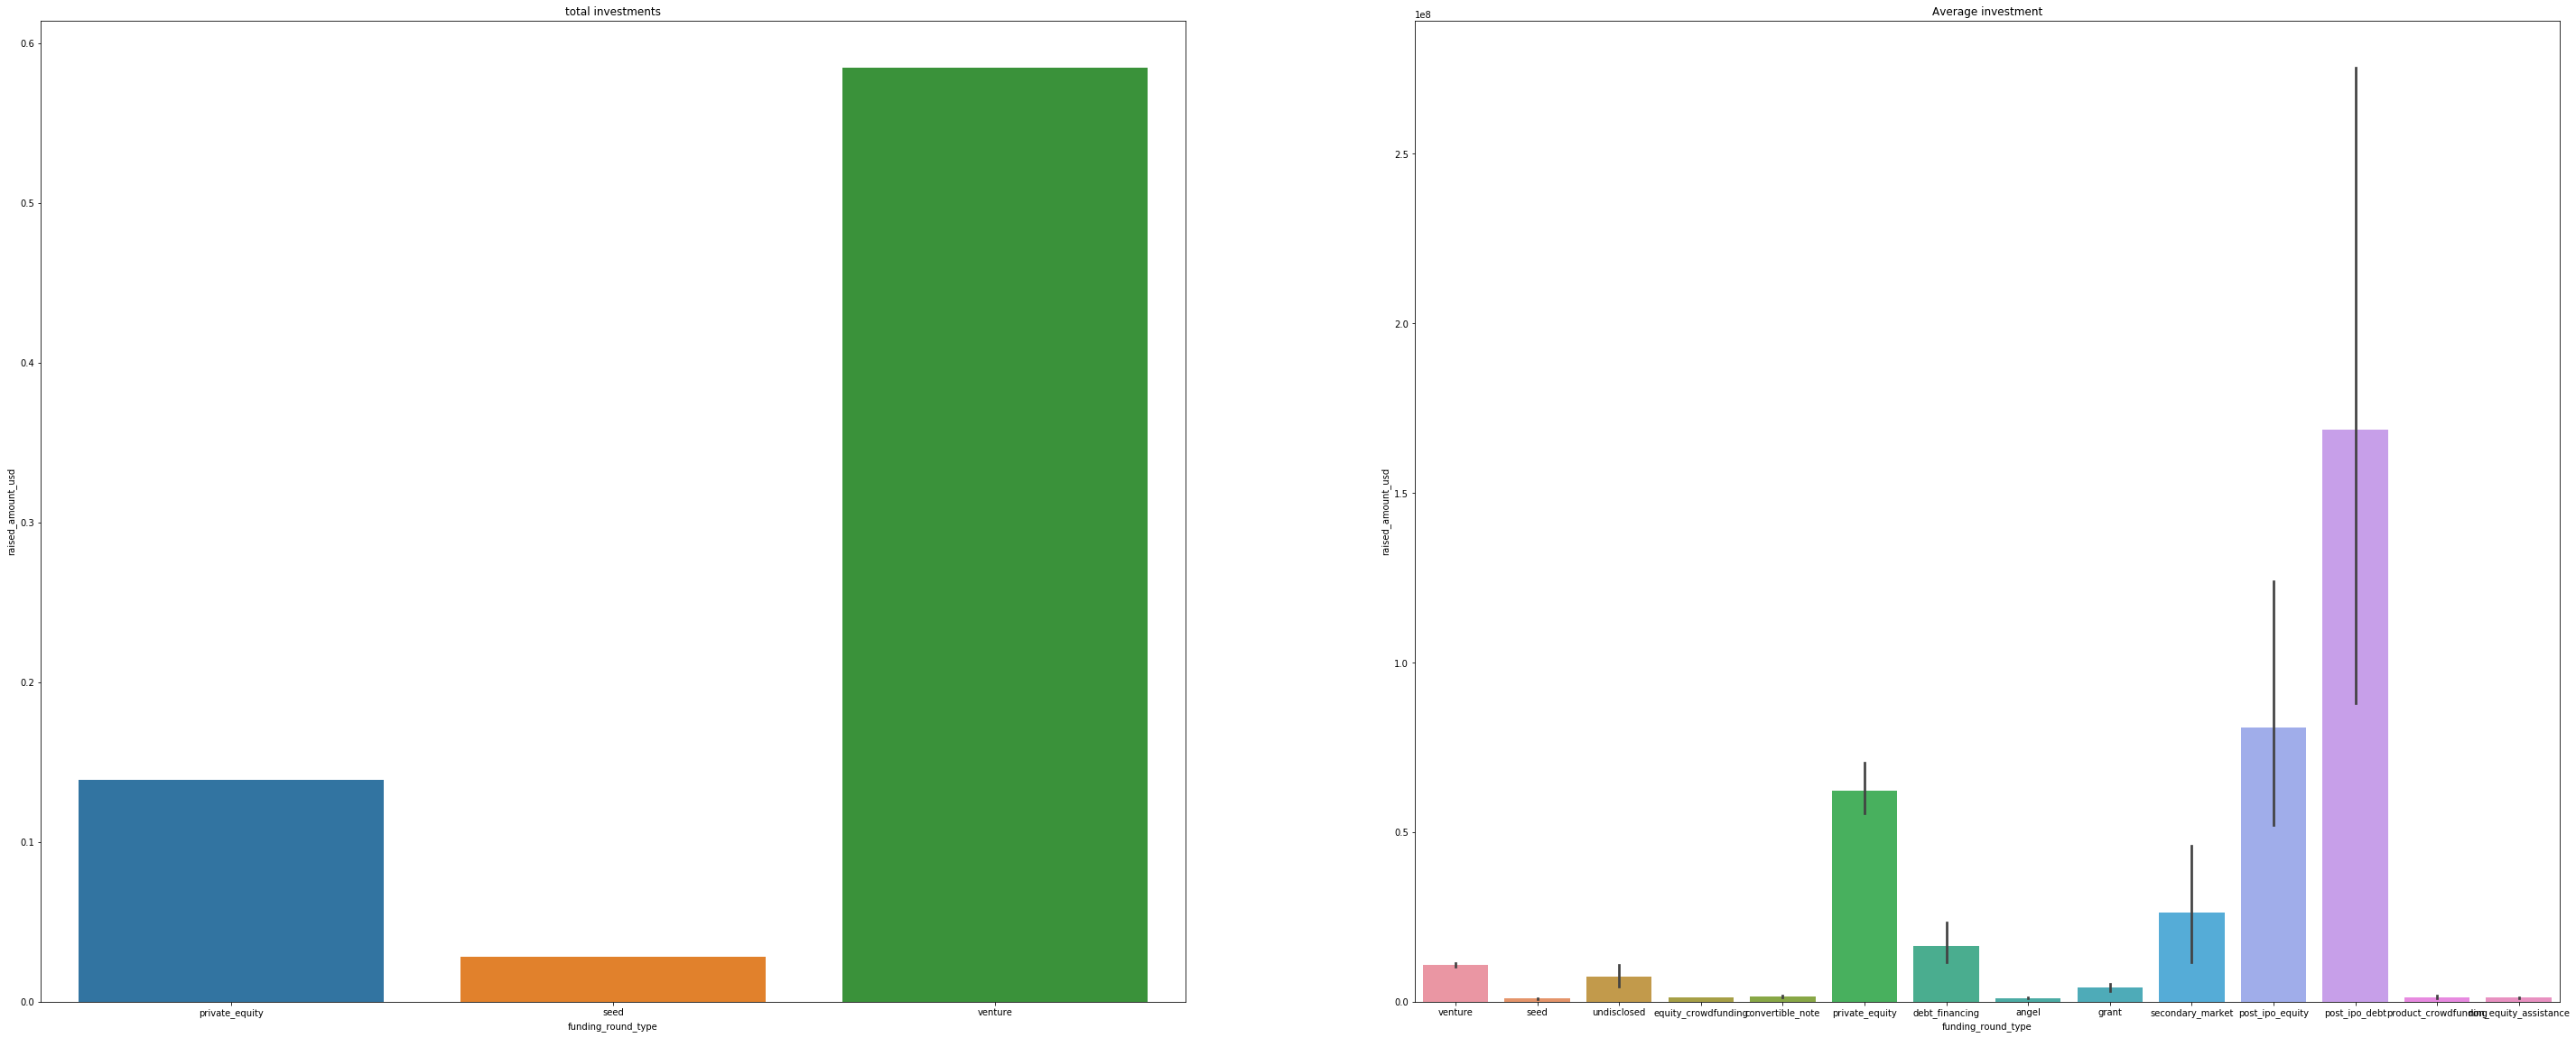

In [58]:

# increase figure size 
plt.figure(figsize=(50, 20))

# subplot 1: statistic=mean
plt.subplot(1, 2, 1)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=d1)
plt.title("total investments")

# subplot 2: statistic=median
plt.subplot(1, 2, 2)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame )
plt.title("Average investment")

plt.show()

Text(0.5,1,'total investments')

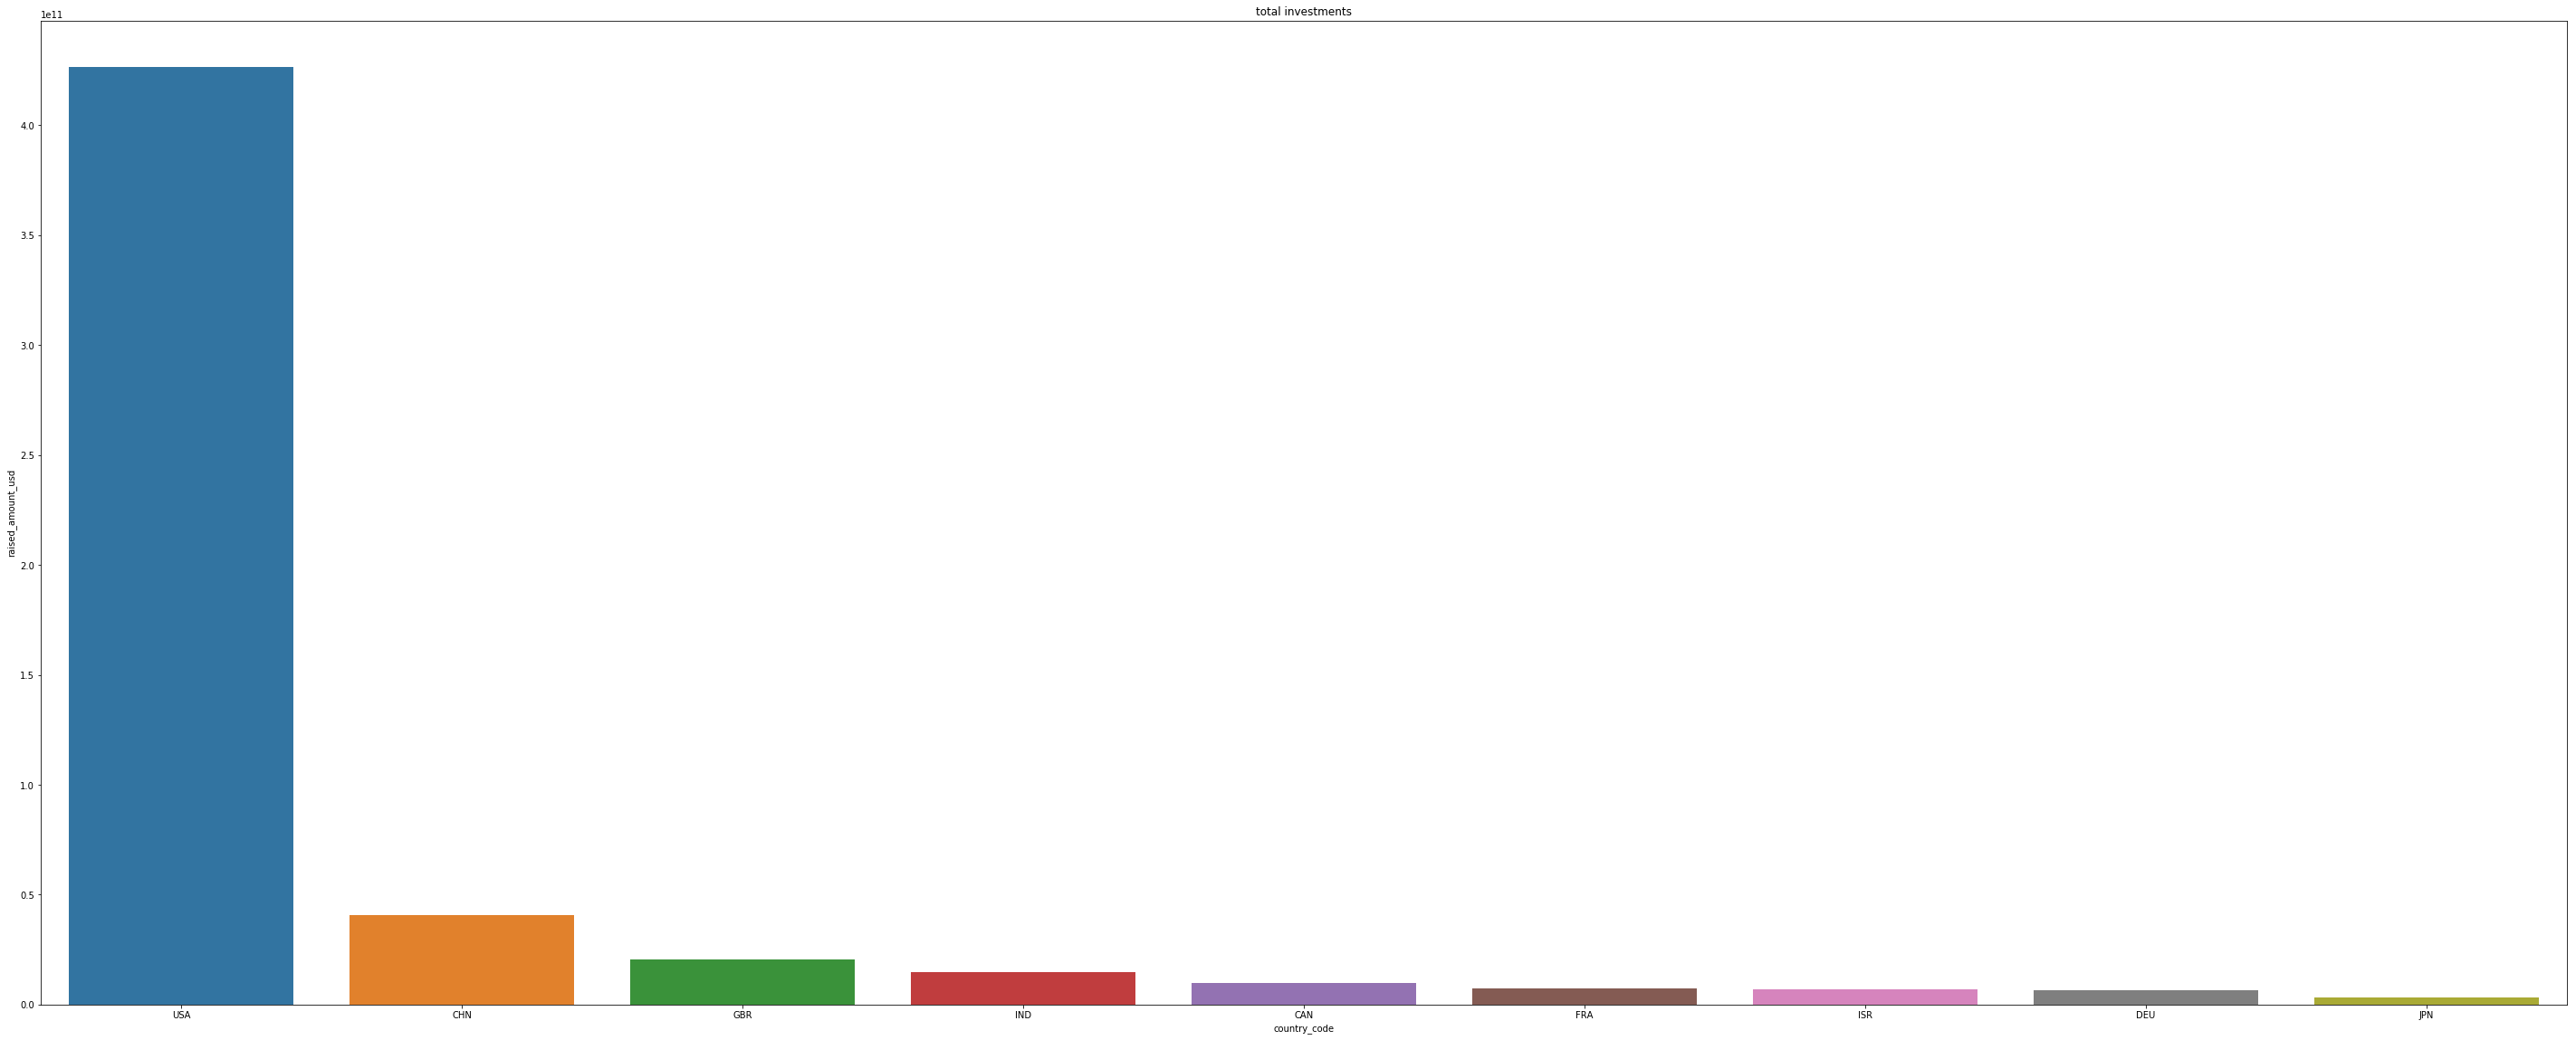

In [59]:
plt.figure(figsize=(50, 20))

# subplot 1: statistic=mean
sns.barplot(x='country_code', y='raised_amount_usd', data=venture_country)
plt.title("total investments")

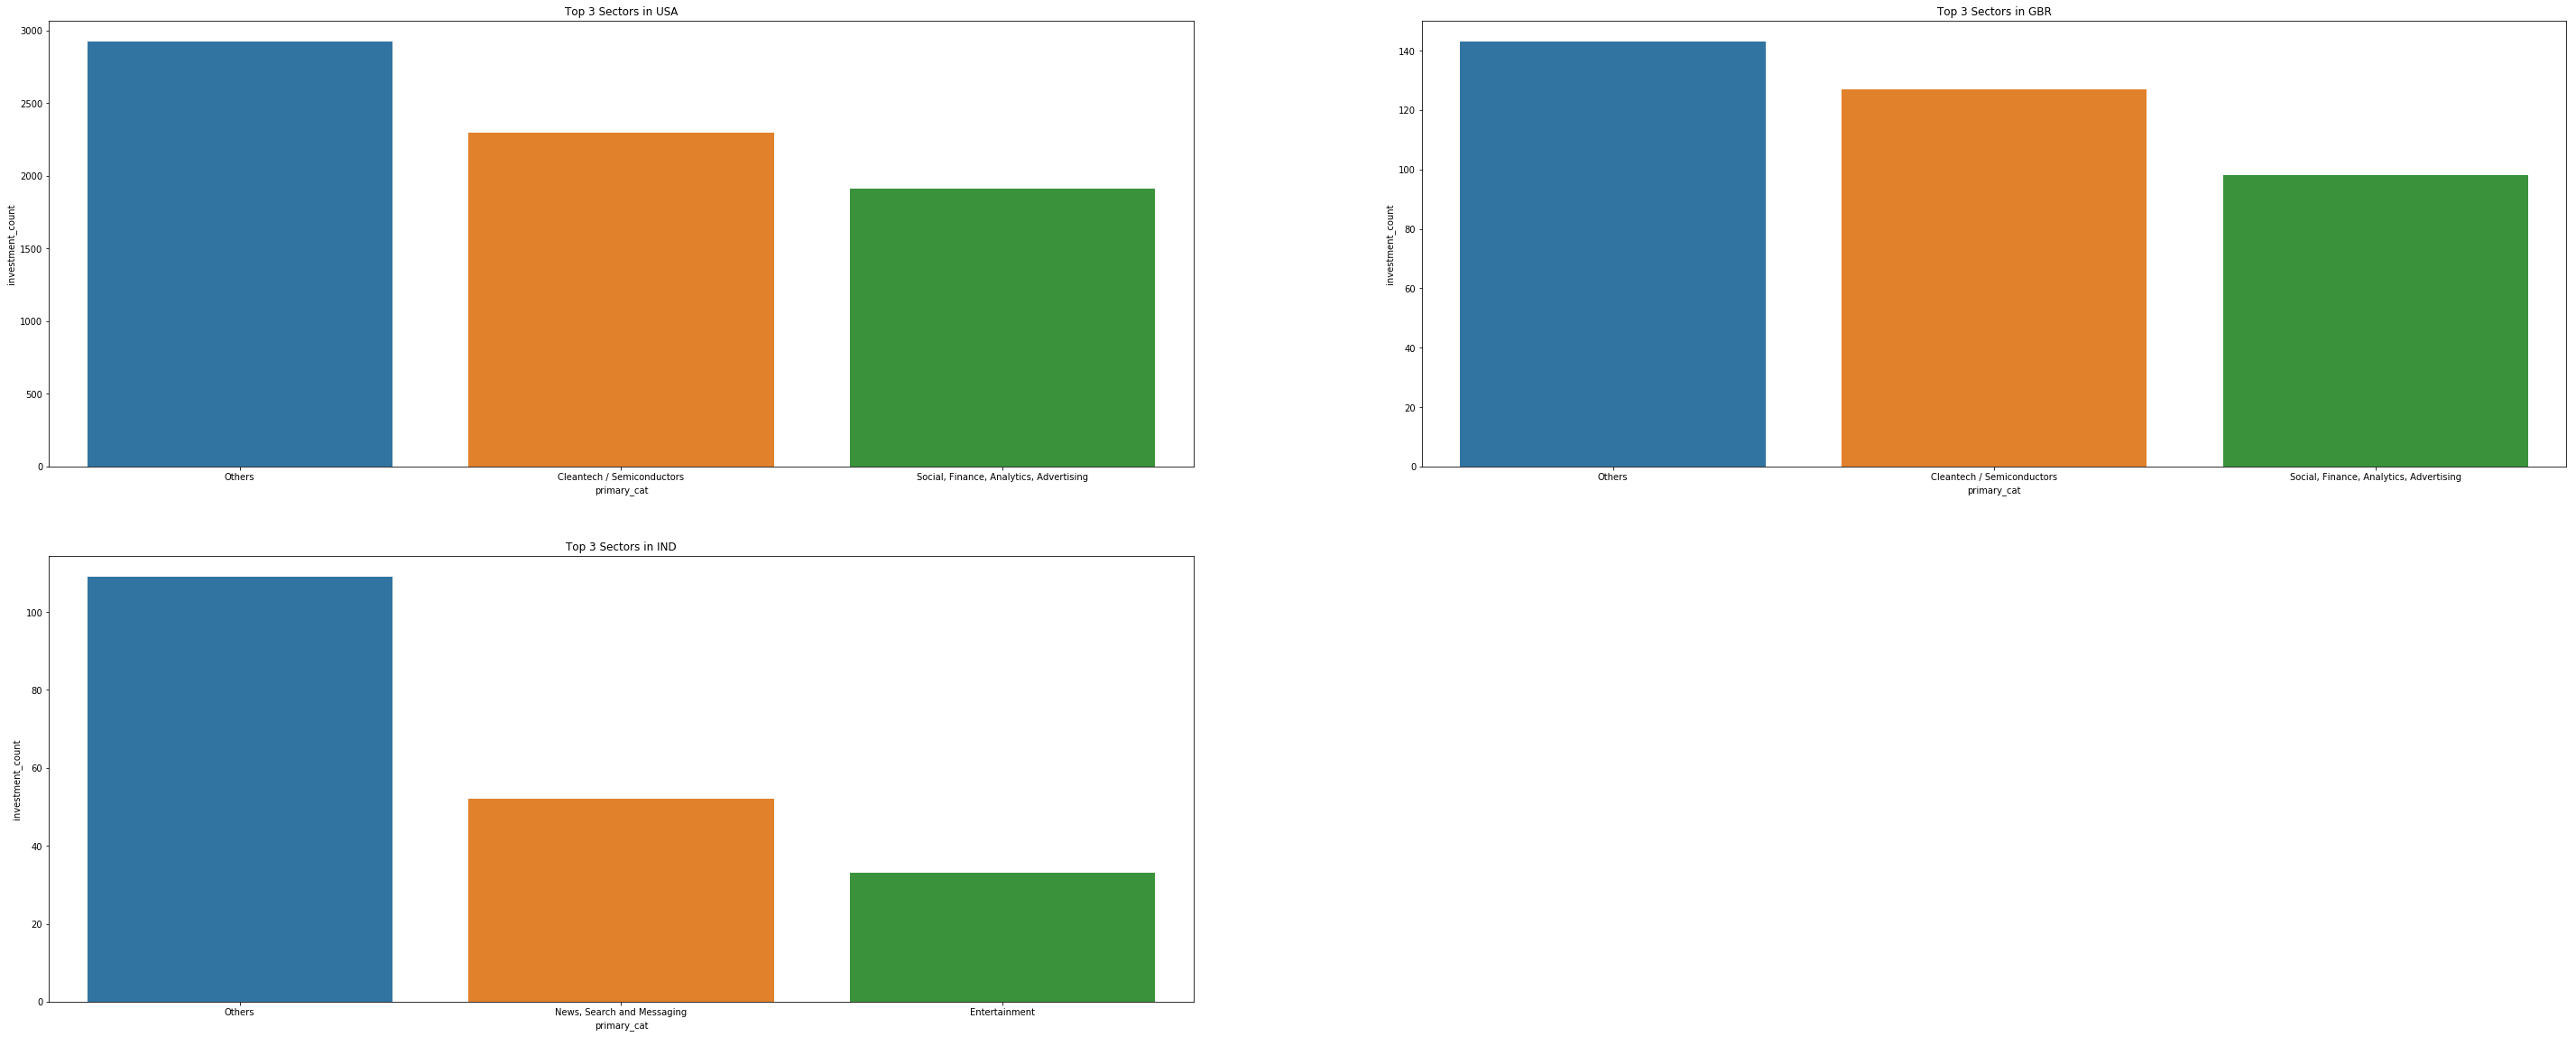

In [60]:
# //A plot showing the number of investments in the top 3 sectors of the top 3 countries 
# // on one chart (for the chosen investment type FT). 


# increase figure size 
plt.figure(figsize=(50, 20))

# subplot 1: statistic=mean
plt.subplot(2, 2, 1)
sns.barplot(x='primary_cat', y='investment_count', data=D1_count.head(3))
plt.title("Top 3 Sectors in USA")

# subplot 2: statistic=median
plt.subplot(2, 2, 2)
sns.barplot(x='primary_cat', y='investment_count', data=D2_count.head(3))
plt.title("Top 3 Sectors in GBR")

# subplot 2: statistic=median
plt.subplot(2, 2, 3)
sns.barplot(x='primary_cat', y='investment_count', data=D3_count.head(3))
plt.title("Top 3 Sectors in IND")

plt.show()